# abhishek badhan 
# dbda
# 220980725002

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import model_selection 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import KFold 
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

In [5]:
t=pd.read_csv('titanic.csv')

In [6]:
t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [7]:
t.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [9]:
t.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
886,0,2,male,27.0,0,0,13.00,S,NaN
887,1,1,female,19.0,0,0,30.00,S,B
888,0,3,female,NaN,1,2,23.45,S,NaN
889,1,1,male,26.0,0,0,30.00,C,C
890,0,3,male,32.0,0,0,7.75,Q,NaN


In [10]:
t.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [11]:
t['embarked'] =t['embarked'].fillna(2)

In [12]:
t.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      0
deck        688
dtype: int64

In [13]:
corr_matrix = t[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']].corr()

<AxesSubplot:>

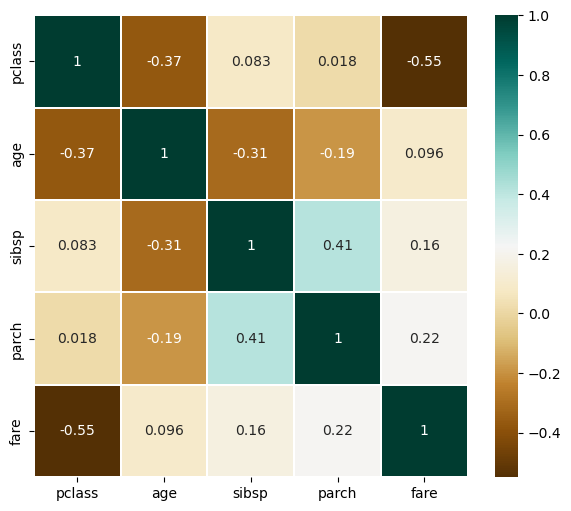

In [14]:
import seaborn as sns
plt.figure(figsize=(7, 6))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

In [15]:
nanidx = t['age'][t['age'].isnull()].index


In [16]:
pred_age = t['age'][((t.sibsp == t["sibsp"]) & (t.parch == t["parch"]) & (t.pclass == t["pclass"]))].median()
if not np.isnan(pred_age):
    t['age'] = pred_age
else:
    t['age'] = t['age'].median()

In [17]:
t.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
deck        688
dtype: int64

In [18]:
t['age']

0      28.0
1      28.0
2      28.0
3      28.0
4      28.0
       ... 
886    28.0
887    28.0
888    28.0
889    28.0
890    28.0
Name: age, Length: 891, dtype: float64

In [19]:
t['deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: object

In [20]:
t1 = t.drop(columns=['deck'])

In [21]:
t1

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,28.0,1,0,7.2500,S
1,1,1,female,28.0,1,0,71.2833,C
2,1,3,female,28.0,0,0,7.9250,S
3,1,1,female,28.0,1,0,53.1000,S
4,0,3,male,28.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,28.0,0,0,13.0000,S
887,1,1,female,28.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,28.0,0,0,30.0000,C


In [22]:
t1['sex'] = t1['sex'].map({'male':0, 'female':1})
t1['embarked'] = t1['embarked'].map({'C':0, 'Q':1, 'S':2})

In [23]:
t1

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,28.0,1,0,7.2500,2.0
1,1,1,1,28.0,1,0,71.2833,0.0
2,1,3,1,28.0,0,0,7.9250,2.0
3,1,1,1,28.0,1,0,53.1000,2.0
4,0,3,0,28.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,0,28.0,0,0,13.0000,2.0
887,1,1,1,28.0,0,0,30.0000,2.0
888,0,3,1,28.0,1,2,23.4500,2.0
889,1,1,0,28.0,0,0,30.0000,0.0


In [24]:
t1.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

Text(0, 0.5, 'Passenger Count')

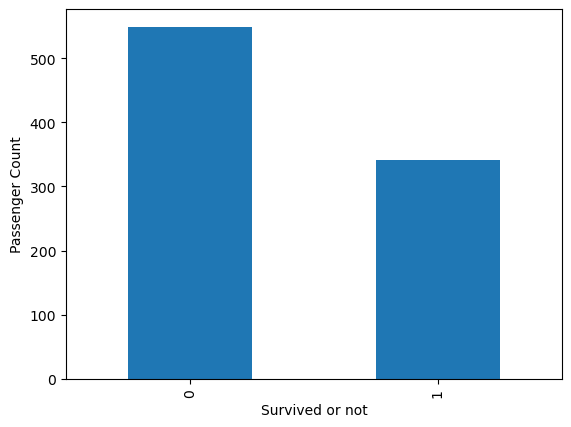

In [25]:
plt = t.survived.value_counts().plot(kind='bar')
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

<AxesSubplot:>

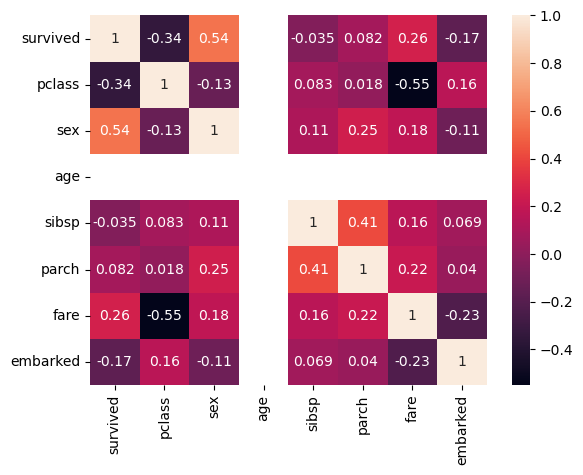

In [92]:
sns.heatmap(t1.corr(),annot=True)

In [94]:
corr_matrix=t1.corr()
corr_matrix['survived'].sort_values(ascending=False)

survived    1.000000
sex         0.543351
fare        0.257307
parch       0.081629
sibsp      -0.035322
embarked   -0.169718
pclass     -0.338481
age              NaN
Name: survived, dtype: float64

In [110]:
s = t1.iloc[:,0:4].values
t=t1.iloc[:,4].values

In [111]:
s

array([[ 0.,  3.,  0., 28.],
       [ 1.,  1.,  1., 28.],
       [ 1.,  3.,  1., 28.],
       ...,
       [ 0.,  3.,  1., 28.],
       [ 1.,  1.,  0., 28.],
       [ 0.,  3.,  0., 28.]])

In [112]:
t

array([1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, 0, 0, 0,
       0, 0, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 2, 1, 4, 0, 1, 1, 0, 0, 0, 0, 1, 5, 0, 0, 1, 3, 0, 1,
       0, 0, 4, 2, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0,
       3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 4, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 4, 1, 0, 0, 1,
       3, 0, 0, 0, 8, 0, 4, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 8, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [113]:
S_train, S_test, t_train, t_test = train_test_split(s, t, test_size=0.2, random_state=42)
sc = StandardScaler()
S_train = sc.fit_transform(S_train)
S_test = sc.transform(S_test)

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
logreg = LogisticRegression()
logreg.fit(S_train, t_train)
t_pred = logreg.predict(S_test)
acc_log = round(logreg.score(S_train, t_train) *100, 2)
acc_log

67.98

In [116]:

from sklearn.ensemble import RandomForestClassifier

In [117]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(S_train, t_train)
t_pred = random_forest.predict(S_test)
random_forest.score(S_train, t_train)
acc_random_forest = round(random_forest.score(S_train, t_train) *100, 2)
acc_random_forest

68.12

In [118]:
print('Mean Absolute Error:', metrics.mean_absolute_error(t_test, t_pred))
print('Mean Squared Error:', metrics.mean_squared_error(t_test, t_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(t_test, t_pred)))



Mean Absolute Error: 0.4134078212290503
Mean Squared Error: 0.7039106145251397
Root Mean Squared Error: 0.8389938107788041


In [119]:
d=pd.read_csv('diabetes.csv')

In [120]:
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [121]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [122]:
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [123]:
d.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [124]:
d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [125]:
x=d.drop(['Outcome'], axis=1)
y=d['Outcome']

In [126]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [127]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
pip install xgboost

In [131]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.5,colsample_bytree=1, max_depth=8)

In [136]:
xgbc.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [137]:
prediction_xgbc=xgbc.predict(x_test)

In [139]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(confusion_matrix(y_test,prediction_xgbc))
print('\n')
print(classification_report(y_test,prediction_xgbc))
print('\n')
print('Accuracy Score: ',round(accuracy_score(y_test,prediction_xgbc), ndigits=2))

[[93 14]
 [14 33]]


              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.70      0.70      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



Accuracy Score:  0.82


In [140]:
from sklearn.model_selection import GridSearchCV


In [143]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
model1 = abc.fit(x_train, y_train)
y_pred = model1.predict(x_test)
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.7792207792207793


In [144]:
from sklearn.metrics import accuracy_score
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.7792207792207793


In [145]:
from sklearn.svm import SVC

In [147]:

from sklearn.metrics import accuracy_score
svc=SVC(probability=True, kernel='linear')
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1, random_state=0)
model2 = abc.fit(x_train, y_train)
y_pred = model2.predict(x_test)
print("Model Accuracy with SVC Base Estimator:",accuracy_score(y_test, y_pred))

Model Accuracy with SVC Base Estimator: 0.6948051948051948


In [48]:
b=pd.read_csv('breast-cancer.csv')

In [49]:
b

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [50]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [51]:
b.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
b.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [61]:
b.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [69]:
b1=b.drop(['id'],axis=1)
b1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [75]:
b1=b1[b1.diagnosis=='M']

In [77]:
from sklearn.model_selection import train_test_split
Y = b1['diagnosis']
X =b1.drop(['diagnosis'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [78]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (169, 30)
Y train shape:  (169,)
X test shape:  (43, 30)
Y test shape:  (43,)


In [79]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, Y_train)

# We predict target values
Y_predict4 = dtcla.predict(X_test)

In [81]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, Y_train)

# We predict target values
Y_predict4 = dtcla.predict(X_test)


In [91]:


from sklearn.metrics import confusion_matrix
dtcla_cm = confusion_matrix(Y_test, Y_predict4)


In [86]:
# Test score
score_dtcla = dtcla.score(X_test, Y_test)
print(score_dtcla)

1.0
